<a href="https://colab.research.google.com/github/Kamilya2020/Classification/blob/main/Convolutional_Neural_Network_for_Car_Model_MultiClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/dataCar.zip # Décompresser votre base de données à partir du Drive

Archive:  /content/drive/MyDrive/dataCar.zip
   creating: data/
   creating: data/TRAIN/
   creating: data/TRAIN/Mercedes/
  inflating: data/TRAIN/Mercedes/Mercedes0.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes1.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes10.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes11.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes12.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes13.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes14.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes2.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes3.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes4.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes5.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes6.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes7.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes8.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes9.jpg  
   creating: data/TRAIN/Peugeot/
  inflating: data/TRAIN/Peugeot/Peugeot0.jpg  
  inflating: data/TRAIN/Peugeot/Peugeot1.jpg  
  inflatin

In [3]:
import os #operating system listdir [file1,file1, ..., file n]
print('total Training Mercedes images:', len(os.listdir('/content/data/TRAIN/Mercedes')))
print('total Training Peugeot images:', len(os.listdir('/content/data/TRAIN/Peugeot')))
print('total Training Toyota images:', len(os.listdir('/content/data/TRAIN/Toyota')))
#Validation
print('total Validation Mercedes images:', len(os.listdir('/content/data/VAL/Mercedes')))
print('total Validation Peugeot images:', len(os.listdir('/content/data/VAL/Peugeot')))
print('total Validation Toyota images:', len(os.listdir('/content/data/VAL/Toyota')))

total Training Mercedes images: 15
total Training Peugeot images: 15
total Training Toyota images: 15
total Validation Mercedes images: 5
total Validation Peugeot images: 5
total Validation Toyota images: 5


In [4]:
train_dir = '/content/data/TRAIN'
validation_dir = '/content/data/VAL'

In [5]:
from tensorflow.keras.models import Sequential # Sockle on which we will put our layers
from keras import layers
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(227, 227, 3)))
#convolutional layer with: 256 filters of size 3x3, stride=1, padding =0
model.add(layers.MaxPooling2D((2, 2)))
#pooling layer with: 2x2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(3, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   zoom_range=0.5,
                                   horizontal_flip=False,
                                   vertical_flip=True,
                                   fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=1,
    class_mode='categorical')
validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=1,
    class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [8]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_generator,epochs=25, validation_data=validation_generator, callbacks=callbacks_list)

Epoch 1/25
45/45 [==============================] - 9s 23ms/step - loss: 2.1973 - accuracy: 0.2667 - val_loss: 1.1242 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/25
45/45 [==============================] - 1s 19ms/step - loss: 1.2236 - accuracy: 0.2889 - val_loss: 1.1159 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/25
45/45 [==============================] - 1s 22ms/step - loss: 1.1949 - accuracy: 0.3111 - val_loss: 1.1167 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/25
45/45 [==============================] - 1s 19ms/step - loss: 1.1430 - accuracy: 0.2000 - val_loss: 1.1539 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 5/25
45/45 [==============================] - 1s 20ms/step - loss: 1.1599 - accuracy: 0.2000 - val_loss: 1.1442 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/25
45/45 [==============================] - 1s 19ms/step - loss: 1.1502 - accuracy: 0.3111 - val_loss: 1.2726 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 7/25
45/45 [==============================] - 1s 19ms/step - loss: 1.2

In [9]:
model.save_weights("modelscratch.h5")
print("Saved model to disk")

Saved model to disk


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/content/data/VAL/Mercedes/Mercedes17.jpg'

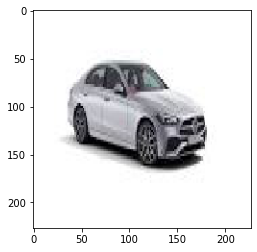

1/1 [==============================] - 0s 87ms/step
[[0.31113735 0.41359633 0.2752663 ]]


In [11]:
img = tf.keras.utils.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print(score)

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/content/data/VAL/Peugeot/Peugeot15.jpg'

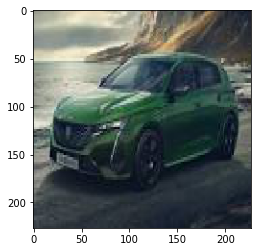

1/1 [==============================] - 0s 19ms/step
[[0.311126   0.41362342 0.27525055]]


In [13]:
img = tf.keras.utils.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print(score)

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/content/data/VAL/Toyota/Toyota18.jpg'

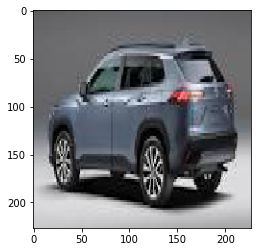

1/1 [==============================] - 0s 15ms/step
[[0.31117445 0.4136462  0.27517942]]


In [15]:
img = tf.keras.utils.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print(score)